# Bandits

Problem setting from Chapter 2 from Sutton & Barto.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm 

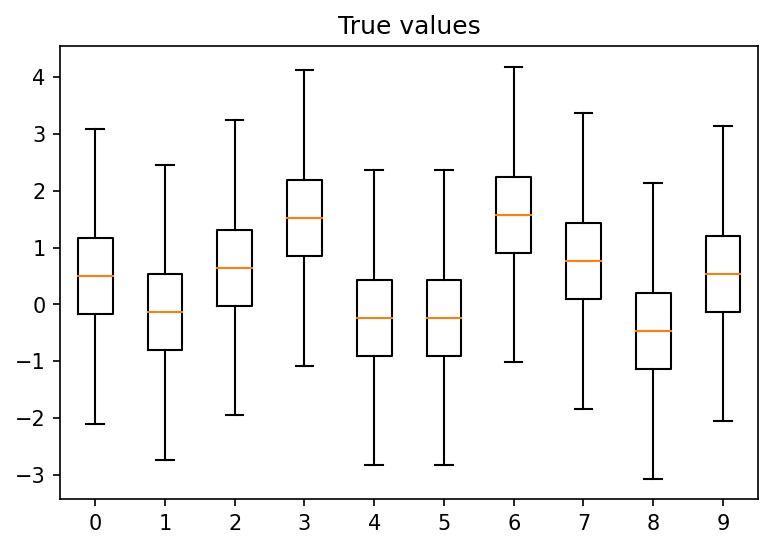

In [3]:
n = 10

np.random.seed(42)
true_values = np.random.normal(0, 1, n)

fig, ax = plt.subplots(1, 1, dpi=150)
stats = []
for i, x in enumerate(true_values):
  stats.append({ "label": i,  "mean":  x, "med": x, "q1": x-0.67, "q3": x+0.67,
            "whislo": x-2.6,  "whishi": x+2.6, "fliers": []  })
ax.bxp(stats);
ax.set_title("True values")
ax.set_xticks(np.arange(1,11))

def bandit(i: int):
    assert i >= 0 and i<10
    return np.random.normal(true_values[i], 1)

## greedy and $\varepsilon$-greedy

In [4]:
def egreedy(inits=np.zeros(n), n_steps=1000, e=0.1, track=False, decay=False):
    
    Q = inits
    counts = np.zeros(n)
    
    if track:  trajectory = []
        
    total_return = 0
    
    for step in range(n_steps):
        
        if np.random.random() < e: action = np.random.randint(0,n)
        else: action = np.argmax(Q)
            
        reward = bandit(action)  
        counts[action] += 1
        Q[action] += 1/counts[action] * (reward -  Q[action])
        
        total_return += reward
        
        if track: trajectory.append((action, reward))
            
        if decay and step%100==99: e /= 2
            
    if track: return total_return, np.array(trajectory)
    
    return total_return

In [5]:
def UCB(n_steps=1000, c=1, track=False):
    
    Q = np.zeros(n)
    counts = np.zeros(n)
    
    if track: trajectory = []
        
    total_return = 0
    
    for step in range(n_steps):
        
        if np.any(counts==0):
            action = np.random.choice(np.arange(n)[counts==0])
        else:
            action = np.argmax(Q + c * np.sqrt(np.log(step)/counts))
            
        reward = bandit(action)  
        counts[action] += 1
        Q[action] += 1/counts[action] * (reward -  Q[action])
        
        total_return += reward
        
        if track: trajectory.append((action, reward))
            
    if track: return total_return, np.array(trajectory)
    
    return total_return

## Tests

(same true values for each run)

In [5]:
n_runs = 1000
n_steps = 1000
epsilon = 0.1
Q_0 = 5
c = 1    

average_reward = np.zeros((5, n_steps))
optimal_actions = np.zeros((5, n_steps))
np.random.seed(42)
true_values = np.random.normal(0, 1, n)
optimal_action = np.argmax(true_values)
                    
for run in tqdm.tqdm(range(n_runs)):
    
    # greedy
    total_return, trajectory = egreedy(e=0, track=True, n_steps=n_steps)
    average_reward[0] += (1/n_runs) * trajectory[:,1]
    optimal_actions[0] += (100/n_runs) * (trajectory[:,0]==optimal_action)

    # epsilon_greedy
    total_return, trajectory = egreedy(e=epsilon, track=True, n_steps=n_steps)
    average_reward[1] += (1/n_runs) * trajectory[:,1]
    optimal_actions[1] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    
    # greedy with optimistic init
    total_return, trajectory = egreedy(inits=[Q_0 for _ in range(n)], e=0, 
                             track=True, n_steps=n_steps)
    average_reward[2] += (1/n_runs) * trajectory[:,1]
    optimal_actions[2] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    
    # UCB
    total_return, trajectory = UCB(c=c, track=True, n_steps=n_steps)
    average_reward[3] += (1/n_runs) * trajectory[:,1]
    optimal_actions[3] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    
    # epsilon_greedy with decay
    total_return, trajectory = egreedy(e=.4, track=True, n_steps=n_steps, decay=True)
    average_reward[4] += (1/n_runs) * trajectory[:,1]
    optimal_actions[4] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    


100%|██████████| 1000/1000 [01:37<00:00, 10.28it/s]


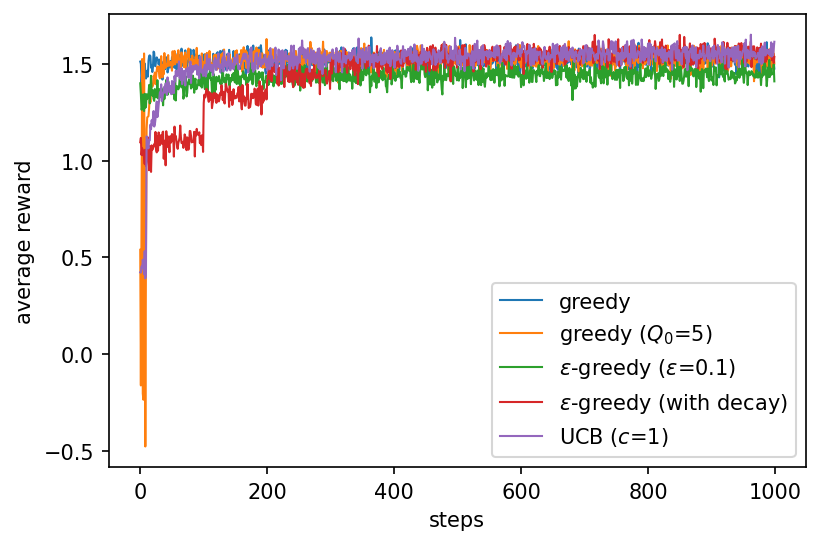

In [6]:
fig, ax = plt.subplots(dpi=150)
ax.plot(average_reward[0], label="greedy", linewidth=1)
ax.plot(average_reward[2], label=f"greedy ($Q_0$={Q_0})", linewidth=1)
ax.plot(average_reward[1], label=f"$\epsilon$-greedy ($\epsilon$={epsilon})", linewidth=1)
ax.plot(average_reward[4], label="$\epsilon$-greedy (with decay)", linewidth=1)
ax.plot(average_reward[3], label=f"UCB ($c$={c})", linewidth=1)
ax.set_ylabel("average reward")
ax.set_xlabel("steps")
#ax.set_ylim([1,2.5])
ax.legend()
plt.show()

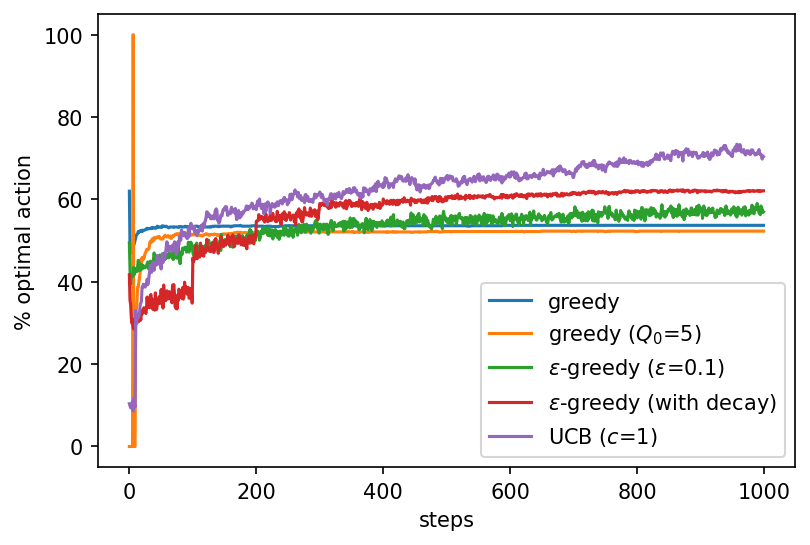

In [7]:
fig, ax = plt.subplots(dpi=150)
ax.plot(optimal_actions[0], label="greedy")
ax.plot(optimal_actions[2], label=f"greedy ($Q_0$={Q_0})")
ax.plot(optimal_actions[1], label=f"$\epsilon$-greedy ($\epsilon$={epsilon})")
ax.plot(optimal_actions[4], label="$\epsilon$-greedy (with decay)")
ax.plot(optimal_actions[3], label=f"UCB ($c$={c})")
ax.set_ylabel("% optimal action")
ax.set_xlabel("steps")
ax.legend()

(new true values for each run)

In [8]:
n_runs = 1000
n_steps = 1000
epsilon = 0.1
Q_0 = 5
c = 1    

average_reward = np.zeros((5, n_steps))
optimal_actions = np.zeros((5, n_steps))

for run in tqdm.tqdm(range(n_runs)):

    np.random.seed(run)
    true_values = np.random.normal(0, 1, n)
    optimal_action = np.argmax(true_values)
    
    # greedy
    total_return, trajectory = egreedy(e=0, track=True, n_steps=n_steps)
    average_reward[0] += (1/n_runs) * trajectory[:,1]
    optimal_actions[0] += (100/n_runs) * (trajectory[:,0]==optimal_action)

    # epsilon_greedy
    total_return, trajectory = egreedy(e=epsilon, track=True, n_steps=n_steps)
    average_reward[1] += (1/n_runs) * trajectory[:,1]
    optimal_actions[1] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    
    # greedy with optimistic init
    total_return, trajectory = egreedy(inits=[Q_0 for _ in range(n)],
                                       e=0, track=True, n_steps=n_steps)
    average_reward[2] += (1/n_runs) * trajectory[:,1]
    optimal_actions[2] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    
    # UCB
    total_return, trajectory = UCB(c=c, track=True, n_steps=n_steps)
    average_reward[3] += (1/n_runs) * trajectory[:,1]
    optimal_actions[3] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    
    # epsilon_greedy with decay
    total_return, trajectory = egreedy(e=.4, track=True, n_steps=n_steps, decay=True)
    average_reward[4] += (1/n_runs) * trajectory[:,1]
    optimal_actions[4] += (100/n_runs) * (trajectory[:,0]==optimal_action)
    


100%|██████████| 1000/1000 [01:35<00:00, 10.46it/s]


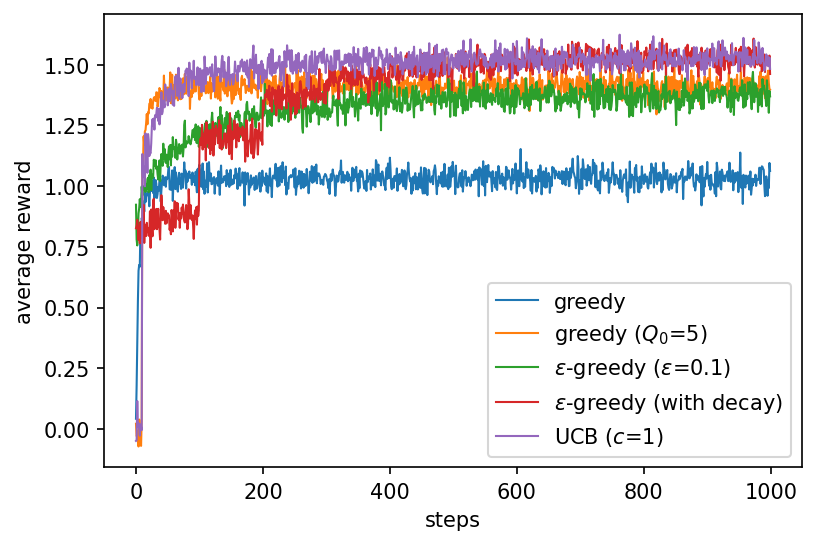

In [9]:
fig, ax = plt.subplots(dpi=150)
ax.plot(average_reward[0], label="greedy", linewidth=1)
ax.plot(average_reward[2], label=f"greedy ($Q_0$={Q_0})", linewidth=1)
ax.plot(average_reward[1], label=f"$\epsilon$-greedy ($\epsilon$={epsilon})", linewidth=1)
ax.plot(average_reward[4], label="$\epsilon$-greedy (with decay)", linewidth=1)
ax.plot(average_reward[3], label=f"UCB ($c$={c})", linewidth=1)
ax.set_ylabel("average reward")
ax.set_xlabel("steps")
#ax.set_ylim([0.5,1.7])
ax.legend()
plt.show()

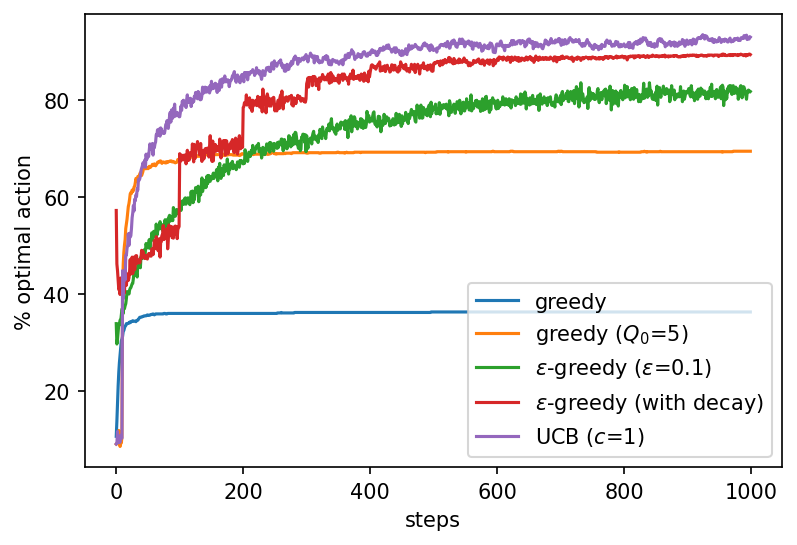

In [12]:
fig, ax = plt.subplots(dpi=150)
ax.plot(optimal_actions[0], label="greedy")
ax.plot(optimal_actions[2], label=f"greedy ($Q_0$={Q_0})")
ax.plot(optimal_actions[1], label=f"$\epsilon$-greedy ($\epsilon$={epsilon})")
ax.plot(optimal_actions[4], label="$\epsilon$-greedy (with decay)")
ax.plot(optimal_actions[3], label=f"UCB ($c$={c})")
ax.set_ylabel("% optimal action")
ax.set_xlabel("steps")
ax.legend();

### Parameter study

In [16]:
n_runs = 500
n_steps = 1000

e_list = [1./128, 1./64, 1./32, 1./16, 1./8, 1./4]
Q0_list = [1/2, 2**2, 2**4, 2**6, 2**8, 2**10]
c_list = [1/8, 1/4, 1/2, 1, 2, 4]

assert len(e_list) == len(Q0_list) == len(c_list)

average_reward = np.zeros((3, len(e_list)))

for run in tqdm.tqdm(range(n_runs)):

    np.random.seed(run)
    true_values = np.random.normal(0, 1, n)
    optimal_action = np.argmax(true_values)

    for i in range(len(e_list)):

        epsilon = e_list[i]
        c = c_list[i]
        optimistic_estimate = Q0_list[i]

        # epsilon_greedy
        average_reward[0, i] += (1/n_runs) * egreedy(e=epsilon, n_steps=n_steps)
        
        # greedy with optimistic init
        average_reward[1, i] += (1/n_runs) * egreedy(inits=[optimistic_estimate for _ in range(n)],
                                          e=0, n_steps=n_steps)
        # UCB
        average_reward[2, i] += (1/n_runs) * UCB(c=c, n_steps=n_steps)

average_reward /= n_steps

100%|██████████| 500/500 [03:06<00:00,  2.68it/s]


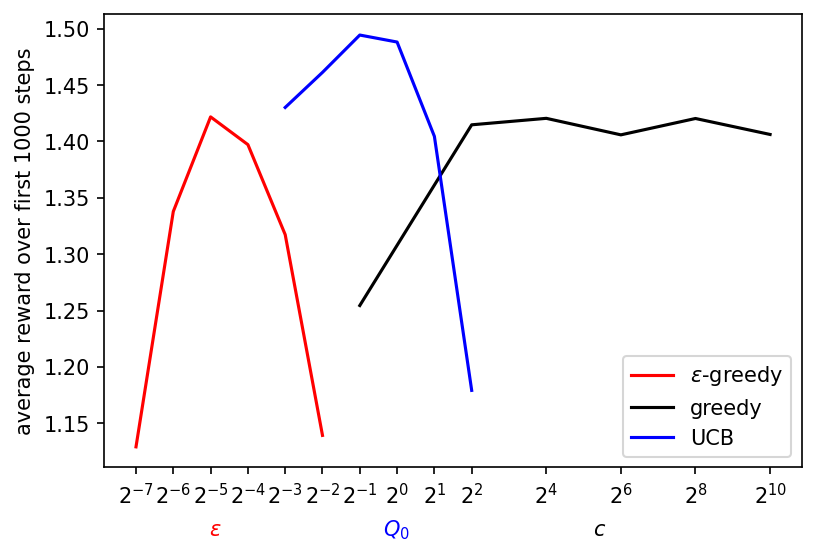

In [17]:
fig, ax = plt.subplots(dpi=150)
ax.plot(e_list, average_reward[0], label="$\epsilon$-greedy", c="red")
ax.plot(Q0_list, average_reward[1], label="greedy", c="black")
ax.plot(c_list, average_reward[2], label="UCB", c="blue")
ax.set_ylabel("average reward over first 1000 steps")
#ax.set_xlabel("$\epsilon$, $c$, $Q_0$")
ax.text(0.15, -0.15, r"$\epsilon$", color='red', transform=ax.transAxes)
ax.text(0.4, -0.15, r"$Q_0$", color='blue', transform=ax.transAxes)
ax.text(0.7, -0.15, r"$c$", color='black', transform=ax.transAxes)
ax.set_xscale("log", basex=2)
ax.set_xticks(list(set(e_list+Q0_list+c_list)))
ax.legend();